https://github.com/RichardKCho/info2950final.git

#### Data analysis questions:
Which stats (hp, attack, defense, sp.attack, sp.defense, speed), types, and generations are correlated with given tiers (OU, UU, RU, PU, NU)? After identifying a correlation, how can we identify the strongest competitive pokemon?

#### What are the observations (rows) and the attributes (columns)?
Rows: pokemon names

Columns: type1, type2, hp, attack, defense, sp.attack, sp.defense, speed, total, average, generation, usage rate, tier

#### Why was this dataset created?
This dataset was created to keep track of how often (in percentage) certain pokemon were used in competitive pokemon battles. The dataset was organized so that users could easily see which pokemon were overused (good), poor-used (bad), and in between.

#### Who funded the creation of the dataset?
Smogon, a competitive pokemon site featuring analyses, articles, and popular forums. They would want this dataset created in order to have more pokemon players use the website for their needs in competitive play.

#### What processes might have influenced what data was observed and recorded and what was not? 
This particular dataset was trying to measure the frequency at which pokemon are used. Therefore, when the data was collected, it collected raw usage and percent usage, along with the pokemon names. Although pokemon stats and moves are largely relevant in competitive play, it was not directly used in collecting usage percentage, therefore it was not recorded. Moreover, this data was collected from the top players in competitive Pokemon play, and therefore are most representative of what the best players use in each tier.

#### What preprocessing was done, and how did the data come to be in the form that you are using? 
First, pokemon in each tier that were used less than 0.00001% were eliminated, as they would be recorded as used 0.00000%. Some pokemon were also listed as "Type:Null" and were therefore removed from the dataset. Additionally, the stats dataset with all pokemon was merged with the tiered dataset to include statistical information on the different pokemon -- all pokemon that were not in the original dataset or showed up more than once were removed.

#### Potential problems with the dataset.
One potential problem with the dataset is that pokemon are listed in multiple tiers because of how Smogon allows competitive players to play lower-tiered pokemon in higher tiers -- for example, Venusaur exists in the UU tier, but is sometimes used in the OU tier of gameplay as a surprise pick. Moreover, lesser evolved and weaker Pokemon (ie. Bulbasaur) are listed in several tiers of gameplay, we have currently left them in to gauge their impact as an outlier, and to understand the extent to which stats play a factor in a Pokemon's usage rate in competitive play.

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for? 
N/A

#### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).
https://www.smogon.com/stats/2020-04/?fbclid=IwAR2L5meKdsTH0Hx-uoPIcq_X-N8f899xK0u_IPkhkYMX01xvK9MiXWwfOq4

In [515]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import math

In [781]:
#reading the dataset
data = pd.read_csv("pokemon_gen_1_to_8.csv")
pok = pd.DataFrame(data)
pok.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.50,1
3,3,Venusaur (Mega Venusaur),Grass,Poison,80,100,123,122,120,80,625,104.17,1
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,51.50,1


In [782]:
#creating a list for OU Pokemon
ou = pd.read_csv("gen8_ou.csv")
ou.columns = ["Name", "Usage Rate"]
tier = "OU"
ou["Tier"] = tier
#merging the pok and tier datasets
ou_merge = pok.merge(ou)
ou_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1,0.00850%,OU
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,0.00020%,OU
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.50,1,1.85513%,OU
3,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,51.50,1,0.00001%,OU
4,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,67.50,1,0.00013%,OU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,882,Dracovish,Water,Dragon,90,90,100,70,80,75,505,84.17,8,15.58086%,OU
325,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,0.01585%,OU
326,884,Duraludon,Steel,Dragon,70,95,115,120,50,85,535,89.17,8,0.09644%,OU
327,886,Drakloak,Dragon,Ghost,68,80,50,60,50,102,410,68.33,8,0.00001%,OU


In [783]:
#creating a list for UU Pokemon
uu = pd.read_csv("gen8_uu.csv")
uu.columns = ["Name", "Usage Rate"]
tier = "UU"
uu["Tier"] = tier
#merging the pok and tier datasets
uu_merge = pok.merge(uu)
uu_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,0.04553%,UU
1,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.50,1,6.07078%,UU
2,6,Charizard,Fire,Flying,78,84,78,109,85,100,534,89.00,1,0.57949%,UU
3,8,Wartortle,Water,NaN,59,63,80,65,80,58,405,67.50,1,0.00622%,UU
4,9,Blastoise,Water,NaN,79,83,100,85,105,78,530,88.33,1,3.01063%,UU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,879,Copperajah,Steel,NaN,122,130,69,80,69,30,500,83.33,8,2.50127%,UU
240,881,Arctozolt,Electric,Ice,90,100,90,90,80,55,505,84.17,8,0.01599%,UU
241,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,0.00819%,UU
242,884,Duraludon,Steel,Dragon,70,95,115,120,50,85,535,89.17,8,3.09772%,UU


In [784]:
#creating a list for RU Pokemon
ru = pd.read_csv("gen8_ru.csv")
ru.columns = ["Name", "Usage Rate"]
tier = "RU"
ru["Tier"] = tier
#merging the pok and tier datasets
ru_merge = pok.merge(ru)
ru_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1,0.00025%,RU
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,0.15707%,RU
2,6,Charizard,Fire,Flying,78,84,78,109,85,100,534,89.00,1,16.40012%,RU
3,8,Wartortle,Water,NaN,59,63,80,65,80,58,405,67.50,1,1.47330%,RU
4,12,Butterfree,Bug,Flying,60,45,50,90,80,70,395,65.83,1,0.10416%,RU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,877,Morpeko,Electric,Dark,58,95,58,70,58,97,436,72.67,8,6.00128%,RU
219,879,Copperajah,Steel,NaN,122,130,69,80,69,30,500,83.33,8,15.06932%,RU
220,881,Arctozolt,Electric,Ice,90,100,90,90,80,55,505,84.17,8,0.49840%,RU
221,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,0.82586%,RU


In [785]:
#creating a list for NU Pokemon
nu = pd.read_csv("gen8_nu.csv")
nu.columns = ["Name", "Usage Rate"]
tier = "NU"
nu["Tier"] = tier
#merging the pok and tier datasets
nu_merge = pok.merge(nu)
nu_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1,0.00025%,NU
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,1.87055%,NU
2,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,67.50,1,0.00283%,NU
3,8,Wartortle,Water,NaN,59,63,80,65,80,58,405,67.50,1,0.12936%,NU
4,12,Butterfree,Bug,Flying,60,45,50,90,80,70,395,65.83,1,3.84170%,NU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,871,Pincurchin,Electric,NaN,48,101,95,91,85,15,435,72.50,8,0.10565%,NU
218,874,Stonjourner,Rock,NaN,100,125,135,20,20,70,470,78.33,8,1.02128%,NU
219,881,Arctozolt,Electric,Ice,90,100,90,90,80,55,505,84.17,8,0.44822%,NU
220,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,5.29169%,NU


In [786]:
#creating a list for PU Pokemon
pu = pd.read_csv("gen8_pu.csv")
pu.columns = ["Name", "Usage Rate"]
tier = "PU"
pu["Tier"] = tier
#merging the pok and tier datasets
pu_merge = pok.merge(pu)
pu_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,1.44871%,PU
1,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,67.50,1,0.14623%,PU
2,7,Squirtle,Water,NaN,44,48,65,50,64,43,314,52.33,1,0.00001%,PU
3,8,Wartortle,Water,NaN,59,63,80,65,80,58,405,67.50,1,1.70883%,PU
4,25,Pikachu,Electric,NaN,35,55,40,50,50,90,320,53.33,1,6.07391%,PU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,874,Stonjourner,Rock,NaN,100,125,135,20,20,70,470,78.33,8,16.52269%,PU
174,878,Cufant,Steel,NaN,72,80,49,40,49,40,330,55.00,8,0.11456%,PU
175,881,Arctozolt,Electric,Ice,90,100,90,90,80,55,505,84.17,8,0.36365%,PU
176,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,0.60533%,PU


In [522]:
#creating a singular DataFrame with all tiers
new_df = pd.concat([ou, uu, ru, nu, pu], axis=0)
#print(len(new_df))

#filtering out the "Type:Null" Pokemon
new_df[~new_df.Name.str.contains("Type: Null")]
#print(len(new_df))

,Name,Usage Rate,Tier
0,Clefable,56.53422%,OU
1,Corviknight,31.22480%,OU
2,Toxapex,28.25718%,OU
3,Hippowdon,25.68515%,OU
4,Ferrothorn,25.17680%,OU
...,...,...,...
202,Wailmer,0.00001%,PU
203,Pidove,0.00001%,PU
204,Squirtle,0.00001%,PU
205,Wooloo,0.00001%,PU


In [795]:
#merging the Pokemon stats data with their usage rate and tier
total_merged = pok.merge(new_df)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 #   display(total_merged)
  #  print(len(merged))

In [799]:
#calculating percentage of each generation in each tier to understand which generations have the highest usage rate
tot_gen = total_merged["Generation"]   

gen1 = []
gen2 = []
gen3 = []
gen4 = []
gen5 = []
gen6 = []
gen7 = []
gen8 = []
tot = []

#finding weights of generations in each tier; repeats for all generations and tiers
for gen in ou_merge["Generation"]:
    if gen == 1:
        gen1.append(gen)
    if gen == 2:
        gen2.append(gen)
    if gen == 3:
        gen3.append(gen)
    if gen == 4:
        gen4.append(gen)
    if gen == 5:
        gen5.append(gen)
    if gen == 6:
        gen6.append(gen)
    if gen == 7:
        gen7.append(gen)
    if gen == 8:
        gen8.append(gen)
ave = (len(gen1)+len(gen2)+len(gen3)+len(gen4)+len(gen5)+len(gen6)+len(gen7)+len(gen8))

#function to find the percentage in each tier
def average(g):
    return round((len(g)/ave),3)

print("The percentage of generation 1 Pokemon in the OU Tier is:", average(gen1))
print("The percentage of generation 2 Pokemon in the OU Tier is:", average(gen2))
print("The percentage of generation 3 Pokemon in the OU Tier is:", average(gen3))
print("The percentage of generation 4 Pokemon in the OU Tier is:", average(gen4))
print("The percentage of generation 5 Pokemon in the OU Tier is:", average(gen5))
print("The percentage of generation 6 Pokemon in the OU Tier is:", average(gen6))
print("The percentage of generation 7 Pokemon in the OU Tier is:", average(gen7))
print("The percentage of generation 8 Pokemon in the OU Tier is:", average(gen8))

for gen in uu_merge["Generation"]:
    if gen == 1:
        gen1.append(gen)
    if gen == 2:
        gen2.append(gen)
    if gen == 3:
        gen3.append(gen)
    if gen == 4:
        gen4.append(gen)
    if gen == 5:
        gen5.append(gen)
    if gen == 6:
        gen6.append(gen)
    if gen == 7:
        gen7.append(gen)
    if gen == 8:
        gen8.append(gen)
ave = (len(gen1)+len(gen2)+len(gen3)+len(gen4)+len(gen5)+len(gen6)+len(gen7)+len(gen8))

print("\nThe percentage of generation 1 Pokemon in the UU Tier is:", average(gen1))
print("The percentage of generation 2 Pokemon in the UU Tier is:", average(gen2))
print("The percentage of generation 3 Pokemon in the UU Tier is:", average(gen3))
print("The percentage of generation 4 Pokemon in the UU Tier is:", average(gen4))
print("The percentage of generation 5 Pokemon in the UU Tier is:", average(gen5))
print("The percentage of generation 6 Pokemon in the UU Tier is:", average(gen6))
print("The percentage of generation 7 Pokemon in the UU Tier is:", average(gen7))
print("The percentage of generation 8 Pokemon in the UU Tier is:", average(gen8))

for gen in ru_merge["Generation"]:
    if gen == 1:
        gen1.append(gen)
    if gen == 2:
        gen2.append(gen)
    if gen == 3:
        gen3.append(gen)
    if gen == 4:
        gen4.append(gen)
    if gen == 5:
        gen5.append(gen)
    if gen == 6:
        gen6.append(gen)
    if gen == 7:
        gen7.append(gen)
    if gen == 8:
        gen8.append(gen)
ave = (len(gen1)+len(gen2)+len(gen3)+len(gen4)+len(gen5)+len(gen6)+len(gen7)+len(gen8))

print("\nThe percentage of generation 1 Pokemon in the RU Tier is:", average(gen1))
print("The percentage of generation 2 Pokemon in the RU Tier is:", average(gen2))
print("The percentage of generation 3 Pokemon in the RU Tier is:", average(gen3))
print("The percentage of generation 4 Pokemon in the RU Tier is:", average(gen4))
print("The percentage of generation 5 Pokemon in the RU Tier is:", average(gen5))
print("The percentage of generation 6 Pokemon in the RU Tier is:", average(gen6))
print("The percentage of generation 7 Pokemon in the RU Tier is:", average(gen7))
print("The percentage of generation 8 Pokemon in the RU Tier is:", average(gen8))

for gen in nu_merge["Generation"]:
    if gen == 1:
        gen1.append(gen)
    if gen == 2:
        gen2.append(gen)
    if gen == 3:
        gen3.append(gen)
    if gen == 4:
        gen4.append(gen)
    if gen == 5:
        gen5.append(gen)
    if gen == 6:
        gen6.append(gen)
    if gen == 7:
        gen7.append(gen)
    if gen == 8:
        gen8.append(gen)
ave = (len(gen1)+len(gen2)+len(gen3)+len(gen4)+len(gen5)+len(gen6)+len(gen7)+len(gen8))

print("\nThe percentage of generation 1 Pokemon in the NU Tier is:", average(gen1))
print("The percentage of generation 2 Pokemon in the NU Tier is:", average(gen2))
print("The percentage of generation 3 Pokemon in the NU Tier is:", average(gen3))
print("The percentage of generation 4 Pokemon in the NU Tier is:", average(gen4))
print("The percentage of generation 5 Pokemon in the NU Tier is:", average(gen5))
print("The percentage of generation 6 Pokemon in the NU Tier is:", average(gen6))
print("The percentage of generation 7 Pokemon in the NU Tier is:", average(gen7))
print("The percentage of generation 8 Pokemon in the NU Tier is:", average(gen8))

for gen in pu_merge["Generation"]:
    if gen == 1:
        gen1.append(gen)
    if gen == 2:
        gen2.append(gen)
    if gen == 3:
        gen3.append(gen)
    if gen == 4:
        gen4.append(gen)
    if gen == 5:
        gen5.append(gen)
    if gen == 6:
        gen6.append(gen)
    if gen == 7:
        gen7.append(gen)
    if gen == 8:
        gen8.append(gen)
ave = (len(gen1)+len(gen2)+len(gen3)+len(gen4)+len(gen5)+len(gen6)+len(gen7)+len(gen8))

print("\nThe percentage of generation 1 Pokemon in the PU Tier is:", average(gen1))
print("The percentage of generation 2 Pokemon in the PU Tier is:", average(gen2))
print("The percentage of generation 3 Pokemon in the PU Tier is:", average(gen3))
print("The percentage of generation 4 Pokemon in the PU Tier is:", average(gen4))
print("The percentage of generation 5 Pokemon in the PU Tier is:", average(gen5))
print("The percentage of generation 6 Pokemon in the PU Tier is:", average(gen6))
print("The percentage of generation 7 Pokemon in the PU Tier is:", average(gen7))
print("The percentage of generation 8 Pokemon in the PU Tier is:", average(gen8))

#from small to big: doing the same analysis for the dataset as a whole
for gen in total_merged["Generation"]:
    if gen == 1:
        gen1.append(gen)
    if gen == 2:
        gen2.append(gen)
    if gen == 3:
        gen3.append(gen)
    if gen == 4:
        gen4.append(gen)
    if gen == 5:
        gen5.append(gen)
    if gen == 6:
        gen6.append(gen)
    if gen == 7:
        gen7.append(gen)
    if gen == 8:
        gen8.append(gen)
ave = (len(gen1)+len(gen2)+len(gen3)+len(gen4)+len(gen5)+len(gen6)+len(gen7)+len(gen8))

print("\nThe percentage of generation 1 Pokemon in all the Tiers is:", average(gen1))
print("The percentage of generation 2 Pokemon in all the Tiers is:", average(gen2))
print("The percentage of generation 3 Pokemon in all the Tiers is:", average(gen3))
print("The percentage of generation 4 Pokemon in all the Tiers is:", average(gen4))
print("The percentage of generation 5 Pokemon in all the Tiers is:", average(gen5))
print("The percentage of generation 6 Pokemon in all the Tiers is:", average(gen6))
print("The percentage of generation 7 Pokemon in all the Tiers is:", average(gen7))
print("The percentage of generation 8 Pokemon in all the Tiers is:", average(gen8))

The percentage of generation 1 Pokemon in the OU Tier is: 0.161
The percentage of generation 2 Pokemon in the OU Tier is: 0.085
The percentage of generation 3 Pokemon in the OU Tier is: 0.094
The percentage of generation 4 Pokemon in the OU Tier is: 0.097
The percentage of generation 5 Pokemon in the OU Tier is: 0.21
The percentage of generation 6 Pokemon in the OU Tier is: 0.058
The percentage of generation 7 Pokemon in the OU Tier is: 0.122
The percentage of generation 8 Pokemon in the OU Tier is: 0.173

The percentage of generation 1 Pokemon in the UU Tier is: 0.157
The percentage of generation 2 Pokemon in the UU Tier is: 0.087
The percentage of generation 3 Pokemon in the UU Tier is: 0.092
The percentage of generation 4 Pokemon in the UU Tier is: 0.099
The percentage of generation 5 Pokemon in the UU Tier is: 0.213
The percentage of generation 6 Pokemon in the UU Tier is: 0.063
The percentage of generation 7 Pokemon in the UU Tier is: 0.115
The percentage of generation 8 Pokemon i

In [800]:
#calculating Spearman Coefficient for Generation and Tiers: the graph is somewhat non-linear and therefore the Spearman r is better fit
#the r^2 value is still calculated to double check the drawn conclusions
reg_out = LinearRegression().fit(total_merged[["Generation"]], tier_dummies[["OU"]])
print("The Spearman Coefficient of Generation and the OU Tier is", spearmanr(tot_gen, tier_dummies[["OU"]]).correlation)
print("The r^2 value of Generation and the OU Tier is", reg_out.score(total_merged[["Generation"]], tier_dummies[["OU"]]))

reg_out_uu = LinearRegression().fit(total_merged[["Generation"]], tier_dummies[["UU"]])
print("\nThe Spearman Coefficient of Generation and the UU Tier is", spearmanr(tot_gen, tier_dummies[["UU"]]).correlation)
print("The r^2 value of Generation and the UU Tier is", reg_out_uu.score(total_merged[["Generation"]], tier_dummies[["UU"]]))

reg_out_ru = LinearRegression().fit(total_merged[["Generation"]], tier_dummies[["RU"]])
print("\nThe Spearman Coefficient of Generation and the RU Tier is", spearmanr(tot_gen, tier_dummies[["RU"]]).correlation)
print("The r^2 value of Generation and the RU Tier is", reg_out_ru.score(total_merged[["Generation"]], tier_dummies[["RU"]]))

reg_out_nu = LinearRegression().fit(total_merged[["Generation"]], tier_dummies[["NU"]])
print("\nThe Spearman Coefficient of Generation and the NU Tier is", spearmanr(tot_gen, tier_dummies[["NU"]]).correlation)
print("The r^2 value of Generation and the NU Tier is", reg_out_nu.score(total_merged[["Generation"]], tier_dummies[["NU"]]))

reg_out_pu = LinearRegression().fit(total_merged[["Generation"]], tier_dummies[["NU"]])
print("\nThe Spearman Coefficient of Generation and the NU Tier is", spearmanr(tot_gen, tier_dummies[["NU"]]).correlation)
print("The r^2 value of Generation and the NU Tier is", reg_out_nu.score(total_merged[["Generation"]], tier_dummies[["NU"]]))

The Spearman Coefficient of Generation and the OU Tier is 0.010671266984895612
The r^2 value of Generation and the OU Tier is 0.00012633191632216434

The Spearman Coefficient of Generation and the UU Tier is 0.010141134358574383
The r^2 value of Generation and the UU Tier is 0.00010219683783130319

The Spearman Coefficient of Generation and the RU Tier is 0.010656348918343552
The r^2 value of Generation and the RU Tier is 9.890862855688187e-05

The Spearman Coefficient of Generation and the NU Tier is -0.009587819926769305
The r^2 value of Generation and the NU Tier is 0.00010713512173565753

The Spearman Coefficient of Generation and the NU Tier is -0.009587819926769305
The r^2 value of Generation and the NU Tier is 0.00010713512173565753


In [834]:
typ1 = []
typ2 = []

#quantifying tiers
tot_t = total_merged["Tier"]
tier_dummies = pd.get_dummies(tot_t)
#tier_dummies.head()

#creating a copy of the total merged dataset
tot_copy = total_merged.copy()
#creating a dataframe of only Pokemon with only 1 type
typ1 = tot_copy[pd.isnull(tot_copy["Type 2"])]
#creating a dataframe of Pokemon with 2 types
tot_copy.dropna(subset =["Type 2"], inplace = True)
typ2 = tot_copy

#creating a quantification of the tiers in both one type and two typed Pokemon
typ1_dummies = pd.get_dummies(typ1["Tier"])
typ2_dummies = pd.get_dummies(typ2["Tier"])

#printing the average mean stats
print("The mean of the average stats of single-type Pokemon is", round(np.mean(typ1["Average"]),3))
print("The mean of the average stats of two-type Pokemon is", round(np.mean(typ2["Average"]),3))

#conducting a regression to see how average stats of a single type Pokemon affects Tiers
typ1_model = LinearRegression().fit(typ1[["Average"]], typ1_dummies)
print("\nThe Spearman Coefficient of Average Stats(One Type) and the OU Tiers is", spearmanr(typ1[["Average"]], typ1_dummies[["OU"]]).correlation)
print("The correlation coefficient of Average Stats(One Type) and the OU Tier is", float(typ1_model.coef_[0]))

print("\nThe Spearman Coefficient of Average Stats(One Type) and the UU Tiers is", spearmanr(typ1[["Average"]], typ1_dummies[["UU"]]).correlation)
print("The correlation coefficient of Average Stats(One Type) and the UU Tier is", float(typ1_model.coef_[1]))

print("\nThe Spearman Coefficient of Average Stats(One Type) and the RU Tiers is", spearmanr(typ1[["Average"]], typ1_dummies[["RU"]]).correlation)
print("The correlation coefficient of Average Stats(One Type) and the RU Tier is", float(typ1_model.coef_[2]))

print("\nThe Spearman Coefficient of Average Stats(One Type) and the NU Tiers is", spearmanr(typ1[["Average"]], typ1_dummies[["NU"]]).correlation)
print("The correlation coefficient of Average Stats(One Type) and the NU Tier is", float(typ1_model.coef_[3]))

print("\nThe Spearman Coefficient of Average Stats(One Type) and the PU Tiers is", spearmanr(typ1[["Average"]], typ1_dummies[["PU"]]).correlation)
print("The correlation coefficient of Average Stats(One Type) and the PU Tier is", float(typ1_model.coef_[4]))

#conducting a regression to see how average stats of a two-type Pokemon affects Tiers
typ2_model = LinearRegression().fit(typ2[["Average"]], typ2_dummies)
print("\n\nThe Spearman Coefficient of Average Stats(Two-Type) and the OU Tiers is", spearmanr(typ2[["Average"]], typ2_dummies[["OU"]]).correlation)
print("The correlation coefficient of Average Stats(Two-Type) and the OU Tier is", float(typ2_model.coef_[0]))

print("\nThe Spearman Coefficient of Average Stats(Two-Type) and the UU Tiers is", spearmanr(typ2[["Average"]], typ2_dummies[["UU"]]).correlation)
print("The correlation coefficient of Average Stats(Two-Type) and the UU Tier is", float(typ2_model.coef_[1]))

print("\nThe Spearman Coefficient of Average Stats(Two-Type) and the RU Tiers is", spearmanr(typ2[["Average"]], typ2_dummies[["RU"]]).correlation)
print("The correlation coefficient of Average Stats(Two-Type) and the RU Tier is", float(typ2_model.coef_[2]))

print("\nThe Spearman Coefficient of Average Stats(Two-Type) and the NU Tiers is", spearmanr(typ2[["Average"]], typ2_dummies[["NU"]]).correlation)
print("The correlation coefficient of Average Stats(Two-Type) and the NU Tier is", float(typ2_model.coef_[3]))

print("\nThe Spearman Coefficient of Average Stats(Two-Type) and the PU Tiers is", spearmanr(typ2[["Average"]], typ2_dummies[["PU"]]).correlation)
print("The correlation coefficient of Average Stats(Two-Type) and the PU Tier is", float(typ2_model.coef_[4]))

The mean of the average stats of single-type Pokemon is 69.565
The mean of the average stats of two-type Pokemon is 70.583

The Spearman Coefficient of Average Stats(One Type) and the OU Tiers is 0.08140097806255922
The correlation coefficient of Average Stats(One Type) and the OU Tier is -0.0034195490984497427

The Spearman Coefficient of Average Stats(One Type) and the UU Tiers is 0.2029137338203005
The correlation coefficient of Average Stats(One Type) and the UU Tier is 0.001983472642881701

The Spearman Coefficient of Average Stats(One Type) and the RU Tiers is 0.0239604961392162
The correlation coefficient of Average Stats(One Type) and the RU Tier is -0.004463403598706373

The Spearman Coefficient of Average Stats(One Type) and the NU Tiers is -0.13824260069095107
The correlation coefficient of Average Stats(One Type) and the NU Tier is 0.0006834480229387068

The Spearman Coefficient of Average Stats(One Type) and the PU Tiers is -0.18679083910400326
The correlation coefficient 

The mean of HP in the OU Tier is 71.301
The mean of Attack in the OU Tier is 79.502
The mean of Defense in the OU Tier is 77.675
The mean of Sp. Attack in the OU Tier is 71.498
The mean of Sp. Defense in the OU Tier is 74.857
The mean of Speed in the OU Tier is 64.924
The mean of Stats in the OU Tier is 73.293


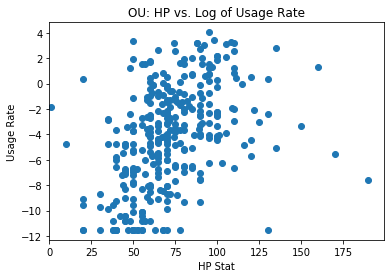

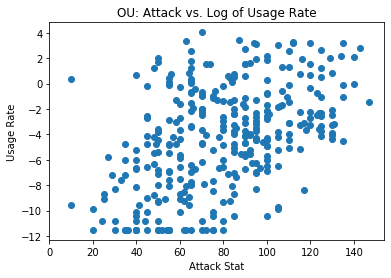

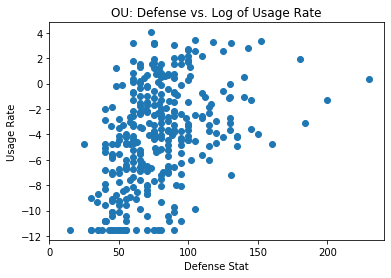

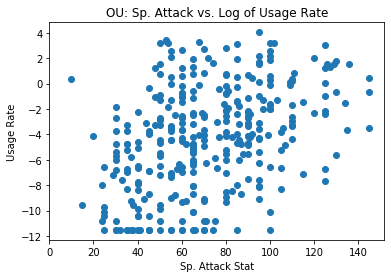

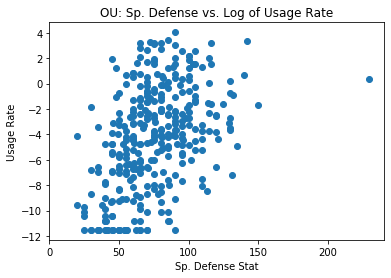

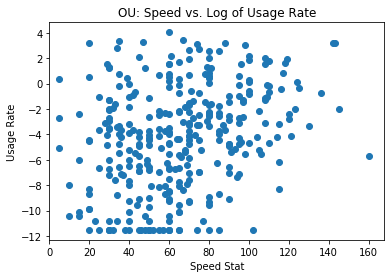

In [787]:
#means of each stat are taken to compare values across tiers; repeated for all tiers
ou_hp = ou_merge["HP"]
print("The mean of HP in the OU Tier is", round(np.mean(ou_hp),3))

ou_atk = ou_merge["Attack"]
print("The mean of Attack in the OU Tier is", round(np.mean(ou_atk),3))

ou_def = ou_merge["Defense"]
print("The mean of Defense in the OU Tier is", round(np.mean(ou_def),3))

ou_spatk = ou_merge["Sp. Attack"]
print("The mean of Sp. Attack in the OU Tier is", round(np.mean(ou_spatk),3))

ou_spdef = ou_merge["Sp. Defense"]
print("The mean of Sp. Defense in the OU Tier is", round(np.mean(ou_spdef),3))

ou_spd = ou_merge["Speed"]
print("The mean of Speed in the OU Tier is", round(np.mean(ou_spd),3))

ou_ave = ou_merge["Average"]
print("The mean of Stats in the OU Tier is", round(np.mean(ou_ave),3))

#this allows numerical analysis of the Usage Rate stat; repeated for all tiers
new_ou = ou_merge["Usage Rate"].str.rstrip("%").astype("float")
ou_merge["Usage Rate"] = new_ou
log_use = np.log(new_ou)

#OU Scatterplots: Log of Usage Rates are taken because the values are very small; repeated for all tiers
plt.scatter(ou_hp,log_use)
plt.title("OU: HP vs. Log of Usage Rate")
plt.xlabel("HP Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_atk,log_use)
plt.title("OU: Attack vs. Log of Usage Rate")
plt.xlabel("Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_def,log_use)
plt.title("OU: Defense vs. Log of Usage Rate")
plt.xlabel("Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_spatk,log_use)
plt.title("OU: Sp. Attack vs. Log of Usage Rate")
plt.xlabel("Sp. Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_spdef,log_use)
plt.title("OU: Sp. Defense vs. Log of Usage Rate")
plt.xlabel("Sp. Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_spd,log_use)
plt.title("OU: Speed vs. Log of Usage Rate")
plt.xlabel("Speed Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

In [788]:
#regression analysis to see the correlation between specific stats and usage rate within the tiers; although the graph is not necessarily linear; repeated for all tiers
#calculating Spearman Coefficient for Stats and Tiers: the graph is somewhat non-linear and therefore the Spearman r may be a better fit; repeated for all tiers
#having both the linear regression values and spearman coefficient can aid in holistic analysis

reg_hp = LinearRegression().fit(ou_merge[["HP"]], ou_merge[["Usage Rate"]])
print("The correlation coefficienct of HP and OU Usage Rate is", float(np.corrcoef(ou_hp, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of HP and the OU Usage Rate is", float(reg_hp.coef_))
print("The Spearman Coefficient of HP and the OU Usage Rate is", spearmanr(ou_hp, ou_merge["Usage Rate"]).correlation)

reg_atk = LinearRegression().fit(ou_merge[["Attack"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Attack and OU Usage Rate is", float(np.corrcoef(ou_atk, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Attack and the OU Usage Rate is", float(reg_atk.coef_))
print("The Spearman Coefficient of Attack and the OU Usage Rate is", spearmanr(ou_atk, ou_merge["Usage Rate"]).correlation)

reg_def = LinearRegression().fit(ou_merge[["Defense"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Defense and OU Usage Rate is", float(np.corrcoef(ou_def, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Defense and the OU Usage Rate is", float(reg_def.coef_))
print("The Spearman Coefficient of Defense and the OU Usage Rate is", spearmanr(ou_def, ou_merge["Usage Rate"]).correlation)

reg_spatk = LinearRegression().fit(ou_merge[["Sp. Attack"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Attack and OU Usage Rate is", float(np.corrcoef(ou_spatk, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Attack and the OU Usage Rate is", float(reg_spatk.coef_))
print("The Spearman Coefficient of Sp. Attack and the OU Usage Rate is", spearmanr(ou_spatk, ou_merge["Usage Rate"]).correlation)

reg_spdef = LinearRegression().fit(ou_merge[["Sp. Defense"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Defense and OU Usage Rate is", float(np.corrcoef(ou_spdef, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Defense and the OU Usage Rate is", float(reg_spdef.coef_))
print("The Spearman Coefficient of Sp. Defense and the OU Usage Rate is", spearmanr(ou_spdef, ou_merge["Usage Rate"]).correlation)

reg_spd = LinearRegression().fit(ou_merge[["Speed"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Speed and OU Usage Rate is", float(np.corrcoef(ou_spd, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Speed and the OU Usage Rate is", float(reg_spd.coef_))
print("The Spearman Coefficient of Speed and the OU Usage Rate is", spearmanr(ou_spd, ou_merge["Usage Rate"]).correlation)

The correlation coefficienct of HP and OU Usage Rate is 0.21063303558941185
The regression slope of HP and the OU Usage Rate is 0.046263908184161776
The Spearman Coefficient of HP and the OU Usage Rate is 0.5000234697612004

The correlation coefficienct of Attack and OU Usage Rate is 0.17063763238818813
The regression slope of Attack and the OU Usage Rate is 0.03291432581842574
The Spearman Coefficient of Attack and the OU Usage Rate is 0.46753865391809873

The correlation coefficienct of Defense and OU Usage Rate is 0.18121482269936856
The regression slope of Defense and the OU Usage Rate is 0.034164832448228336
The Spearman Coefficient of Defense and the OU Usage Rate is 0.45878598218647265

The correlation coefficienct of Sp. Attack and OU Usage Rate is 0.1057332343145886
The regression slope of Sp. Attack and the OU Usage Rate is 0.021117082523685247
The Spearman Coefficient of Sp. Attack and the OU Usage Rate is 0.39719373743296804

The correlation coefficienct of Sp. Defense and 

The mean of HP in the UU Tier is 73.607
The mean of Attack in the UU Tier is 81.689
The mean of Defense in the UU Tier is 79.623
The mean of Sp. Attack in the UU Tier is 73.914
The mean of Sp. Defense in the UU Tier is 77.848
The mean of Speed in the OU Tier is 65.484
The mean of Stats in the UU Tier is 75.36


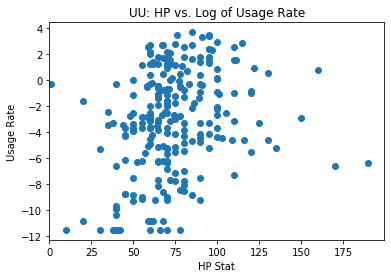

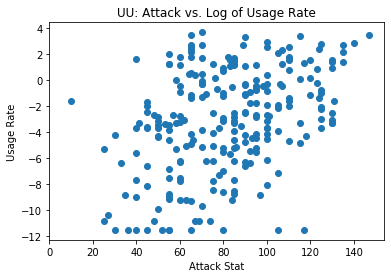

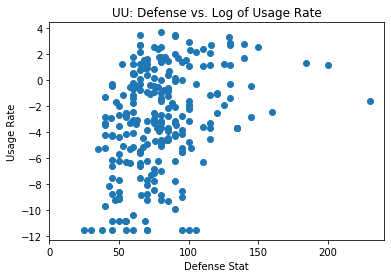

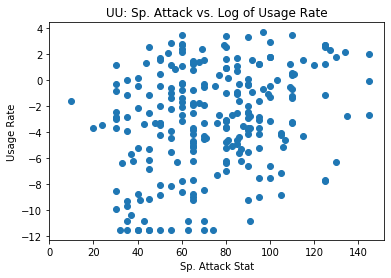

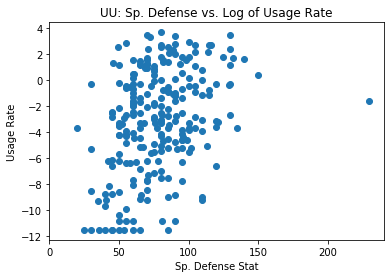

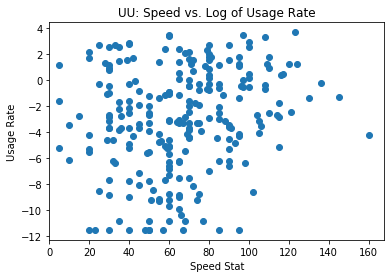

In [789]:
uu_hp = uu_merge["HP"]
print("The mean of HP in the UU Tier is", round(np.mean(uu_hp),3))

uu_atk = uu_merge["Attack"]
print("The mean of Attack in the UU Tier is", round(np.mean(uu_atk),3))

uu_def = uu_merge["Defense"]
print("The mean of Defense in the UU Tier is", round(np.mean(uu_def),3))

uu_spatk = uu_merge["Sp. Attack"]
print("The mean of Sp. Attack in the UU Tier is", round(np.mean(uu_spatk),3))

uu_spdef = uu_merge["Sp. Defense"]
print("The mean of Sp. Defense in the UU Tier is", round(np.mean(uu_spdef),3))

uu_spd = uu_merge["Speed"]
print("The mean of Speed in the OU Tier is", round(np.mean(uu_spd),3))

uu_ave = uu_merge["Average"]
print("The mean of Stats in the UU Tier is", round(np.mean(uu_ave),3))

new_uu = uu_merge["Usage Rate"].str.rstrip("%").astype("float")
uu_merge["Usage Rate"] = new_uu
log_use_uu = np.log(new_uu)

#UU Graphs: Log of Usage Rates are taken because the values are very small
plt.scatter(uu_hp,log_use_uu)
plt.title("UU: HP vs. Log of Usage Rate")
plt.xlabel("HP Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(uu_atk,log_use_uu)
plt.title("UU: Attack vs. Log of Usage Rate")
plt.xlabel("Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(uu_def,log_use_uu)
plt.title("UU: Defense vs. Log of Usage Rate")
plt.xlabel("Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(uu_spatk,log_use_uu)
plt.title("UU: Sp. Attack vs. Log of Usage Rate")
plt.xlabel("Sp. Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(uu_spdef,log_use_uu)
plt.title("UU: Sp. Defense vs. Log of Usage Rate")
plt.xlabel("Sp. Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(uu_spd,log_use_uu)
plt.title("UU: Speed vs. Log of Usage Rate")
plt.xlabel("Speed Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

In [790]:
reg_hp = LinearRegression().fit(uu_merge[["HP"]], uu_merge[["Usage Rate"]])
print("The correlation coefficienct of HP and UU Usage Rate is", float(np.corrcoef(uu_hp, uu_merge["Usage Rate"])[0][1]))
print("The regression slope of HP and the UU Usage Rate is", float(reg_hp.coef_))
print("The Spearman Coefficient of HP and the UU Usage Rate is", spearmanr(uu_hp, uu_merge["Usage Rate"]).correlation)

reg_atk = LinearRegression().fit(uu_merge[["Attack"]], uu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Attack and UU Usage Rate is", float(np.corrcoef(uu_atk, uu_merge["Usage Rate"])[0][1]))
print("The regression slope of Attack and the UU Usage Rate is", float(reg_atk.coef_))
print("The Spearman Coefficient of Attack and the UU Usage Rate is", spearmanr(uu_atk, uu_merge["Usage Rate"]).correlation)

reg_def = LinearRegression().fit(uu_merge[["Defense"]], uu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Defense and UU Usage Rate is", float(np.corrcoef(uu_def, uu_merge["Usage Rate"])[0][1]))
print("The regression slope of Defense and the UU Usage Rate is", float(reg_def.coef_))
print("The Spearman Coefficient of Defense and the UU Usage Rate is", spearmanr(uu_def, uu_merge["Usage Rate"]).correlation)

reg_spatk = LinearRegression().fit(uu_merge[["Sp. Attack"]], uu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Attack and UU Usage Rate is", float(np.corrcoef(uu_spatk, uu_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Attack and the UU Usage Rate is", float(reg_spatk.coef_))
print("The Spearman Coefficient of Sp. Attack and the UU Usage Rate is", spearmanr(uu_spatk, uu_merge["Usage Rate"]).correlation)

reg_spdef = LinearRegression().fit(uu_merge[["Sp. Defense"]], uu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Defense and UU Usage Rate is", float(np.corrcoef(uu_spdef, uu_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Defense and the UU Usage Rate is", float(reg_spdef.coef_))
print("The Spearman Coefficient of Sp. Defense and the UU Usage Rate is", spearmanr(uu_spdef, uu_merge["Usage Rate"]).correlation)

reg_spd = LinearRegression().fit(uu_merge[["Speed"]], uu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Speed and UU Usage Rate is", float(np.corrcoef(uu_spd, uu_merge["Usage Rate"])[0][1]))
print("The regression slope of Speed and the UU Usage Rate is", float(reg_spd.coef_))
print("The Spearman Coefficient of Speed and the UU Usage Rate is", spearmanr(uu_spd, uu_merge["Usage Rate"]).correlation)

The correlation coefficienct of HP and UU Usage Rate is 0.15410384400475044
The regression slope of HP and the UU Usage Rate is 0.034116581199262884
The Spearman Coefficient of HP and the UU Usage Rate is 0.30293746598181037

The correlation coefficienct of Attack and UU Usage Rate is 0.20138987844070064
The regression slope of Attack and the UU Usage Rate is 0.041078103178411006
The Spearman Coefficient of Attack and the UU Usage Rate is 0.37072602223565576

The correlation coefficienct of Defense and UU Usage Rate is 0.20041485601388262
The regression slope of Defense and the UU Usage Rate is 0.038017865565817745
The Spearman Coefficient of Defense and the UU Usage Rate is 0.32668311517104487

The correlation coefficienct of Sp. Attack and UU Usage Rate is 0.16775356667557242
The regression slope of Sp. Attack and the UU Usage Rate is 0.03367868742030914
The Spearman Coefficient of Sp. Attack and the UU Usage Rate is 0.24648495495517203

The correlation coefficienct of Sp. Defense an

The mean of HP in the RU Tier is 69.762
The mean of Attack in the RU Tier is 76.888
The mean of Defense in the RU Tier is 75.39
The mean of Sp. Attack in the RU Tier is 68.596
The mean of Sp. Defense in the RU Tier is 73.22
The mean of Speed in the RU Tier is 61.202
The mean of Stats in the RU Tier is 70.843


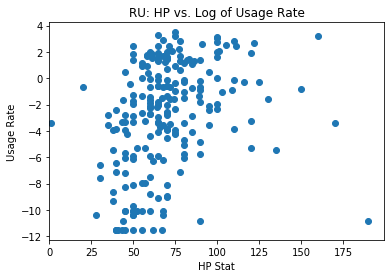

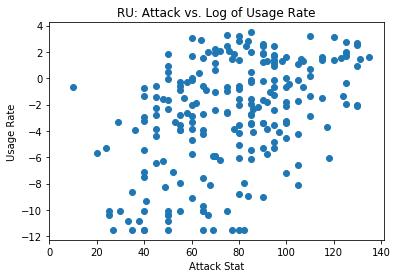

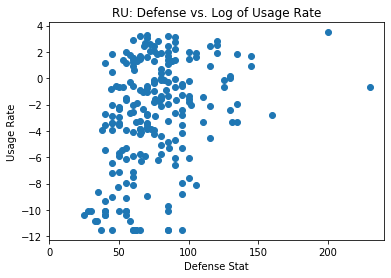

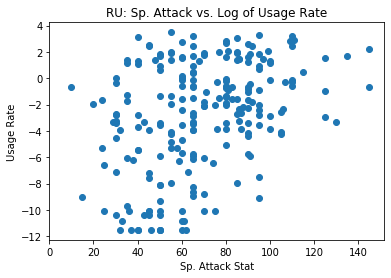

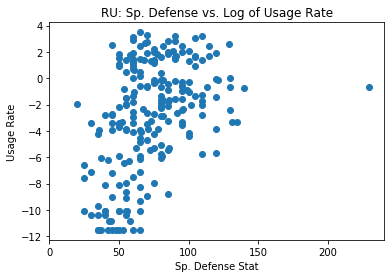

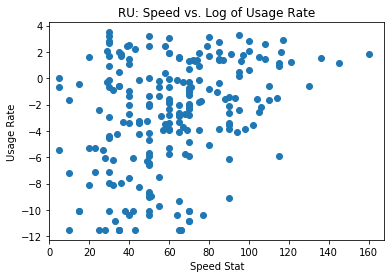

In [791]:
ru_hp = ru_merge["HP"]
print("The mean of HP in the RU Tier is", round(np.mean(ru_hp),3))

ru_atk = ru_merge["Attack"]
print("The mean of Attack in the RU Tier is", round(np.mean(ru_atk),3))

ru_def = ru_merge["Defense"]
print("The mean of Defense in the RU Tier is", round(np.mean(ru_def),3))

ru_spatk = ru_merge["Sp. Attack"]
print("The mean of Sp. Attack in the RU Tier is", round(np.mean(ru_spatk),3))

ru_spdef = ru_merge["Sp. Defense"]
print("The mean of Sp. Defense in the RU Tier is", round(np.mean(ru_spdef),3))

ru_spd = ru_merge["Speed"]
print("The mean of Speed in the RU Tier is", round(np.mean(ru_spd),3))

ru_ave = ru_merge["Average"]
print("The mean of Stats in the RU Tier is", round(np.mean(ru_ave),3))

new_ru = ru_merge["Usage Rate"].str.rstrip("%").astype("float")
ru_merge["Usage Rate"] = new_ru
log_use_ru = np.log(new_ru)

#RU Graphs: Log of Usage Rates are taken because the values are very small
plt.scatter(ru_hp,log_use_ru)
plt.title("RU: HP vs. Log of Usage Rate")
plt.xlabel("HP Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ru_atk,log_use_ru)
plt.title("RU: Attack vs. Log of Usage Rate")
plt.xlabel("Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ru_def,log_use_ru)
plt.title("RU: Defense vs. Log of Usage Rate")
plt.xlabel("Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ru_spatk,log_use_ru)
plt.title("RU: Sp. Attack vs. Log of Usage Rate")
plt.xlabel("Sp. Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ru_spdef,log_use_ru)
plt.title("RU: Sp. Defense vs. Log of Usage Rate")
plt.xlabel("Sp. Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ru_spd,log_use_ru)
plt.title("RU: Speed vs. Log of Usage Rate")
plt.xlabel("Speed Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

In [530]:
reg_hp = LinearRegression().fit(ru_merge[["HP"]], ru_merge[["Usage Rate"]])
print("The correlation coefficienct of HP and RU Usage Rate is", float(np.corrcoef(ru_hp, ru_merge["Usage Rate"])[0][1]))
print("The regression slope of HP and the RU Usage Rate is", float(reg_hp.coef_))
print("The Spearman Coefficient of HP and the RU Usage Rate is", spearmanr(ru_hp, ru_merge["Usage Rate"]).correlation)

reg_atk = LinearRegression().fit(ru_merge[["Attack"]], ru_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Attack and RU Usage Rate is", float(np.corrcoef(ru_atk, ru_merge["Usage Rate"])[0][1]))
print("The regression slope of Attack and the RU Usage Rate is", float(reg_atk.coef_))
print("The Spearman Coefficient of Attack and the RU Usage Rate is", spearmanr(ru_atk, ru_merge["Usage Rate"]).correlation)

reg_def = LinearRegression().fit(ru_merge[["Defense"]], ru_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Defense and RU Usage Rate is", float(np.corrcoef(ru_def, ru_merge["Usage Rate"])[0][1]))
print("The regression slope of Defense and the RU Usage Rate is", float(reg_def.coef_))
print("The Spearman Coefficient of Defense and the RU Usage Rate is", spearmanr(ru_def, ru_merge["Usage Rate"]).correlation)

reg_spatk = LinearRegression().fit(ru_merge[["Sp. Attack"]], ru_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Attack and RU Usage Rate is", float(np.corrcoef(ru_spatk, ru_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Attack and the RU Usage Rate is", float(reg_spatk.coef_))
print("The Spearman Coefficient of Sp. Attack and the RU Usage Rate is", spearmanr(ru_spatk, ru_merge["Usage Rate"]).correlation)

reg_spdef = LinearRegression().fit(ru_merge[["Sp. Defense"]], ru_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Defense and RU Usage Rate is", float(np.corrcoef(ru_spdef, ru_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Defense and the RU Usage Rate is", float(reg_spdef.coef_))
print("The Spearman Coefficient of Sp. Defense and the RU Usage Rate is", spearmanr(ru_spdef, ru_merge["Usage Rate"]).correlation)

reg_spd = LinearRegression().fit(ru_merge[["Speed"]], ru_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Speed and RU Usage Rate is", float(np.corrcoef(ru_spd, ru_merge["Usage Rate"])[0][1]))
print("The regression slope of Speed and the RU Usage Rate is", float(reg_spd.coef_))
print("The Spearman Coefficient of Speed and the RU Usage Rate is", spearmanr(ru_spd, ru_merge["Usage Rate"]).correlation)

The correlation coefficienct of HP and RU Usage Rate is 0.2593189742213295
The regression slope of HP and the RU Usage Rate is 0.054009111246439596
The Spearman Coefficient of HP and the RU Usage Rate is 0.41657671396587526

The correlation coefficienct of Attack and RU Usage Rate is 0.24337951722735654
The regression slope of Attack and the RU Usage Rate is 0.04810344304665869
The Spearman Coefficient of Attack and the RU Usage Rate is 0.4211169615697238

The correlation coefficienct of Defense and RU Usage Rate is 0.21862120038455718
The regression slope of Defense and the RU Usage Rate is 0.04055544755718772
The Spearman Coefficient of Defense and the RU Usage Rate is 0.3525744305995841

The correlation coefficienct of Sp. Attack and RU Usage Rate is 0.17391281320723231
The regression slope of Sp. Attack and the RU Usage Rate is 0.03513912044253668
The Spearman Coefficient of Sp. Attack and the RU Usage Rate is 0.3677415132521316

The correlation coefficienct of Sp. Defense and RU U

The mean of HP in the NU Tier is 64.995
The mean of Attack in the NU Tier is 70.005
The mean of Defense in the NU Tier is 69.959
The mean of Sp. Attack in the NU Tier is 62.91
The mean of Sp. Defense in the NU Tier is 66.635
The mean of Speed in the NU Tier is 57.122
The mean of Stats in the NU Tier is 65.271


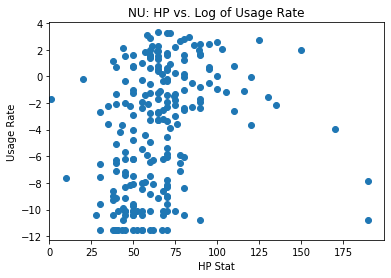

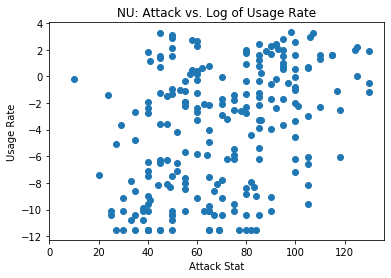

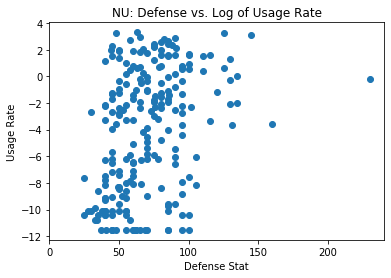

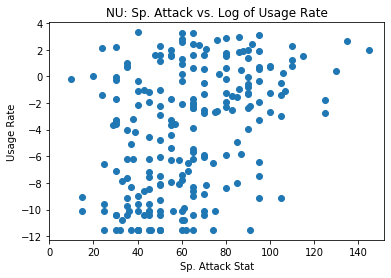

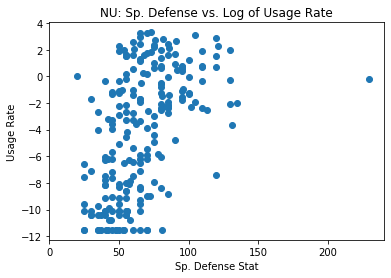

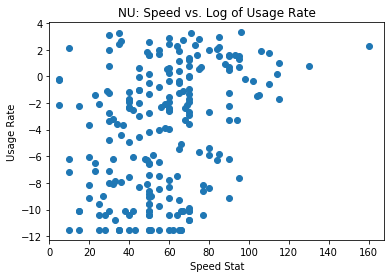

In [792]:
nu_hp = nu_merge["HP"]
print("The mean of HP in the NU Tier is", round(np.mean(nu_hp),3))

nu_atk = nu_merge["Attack"]
print("The mean of Attack in the NU Tier is", round(np.mean(nu_atk),3))

nu_def = nu_merge["Defense"]
print("The mean of Defense in the NU Tier is", round(np.mean(nu_def),3))

nu_spatk = nu_merge["Sp. Attack"]
print("The mean of Sp. Attack in the NU Tier is", round(np.mean(nu_spatk),3))

nu_spdef = nu_merge["Sp. Defense"]
print("The mean of Sp. Defense in the NU Tier is", round(np.mean(nu_spdef),3))

nu_spd = nu_merge["Speed"]
print("The mean of Speed in the NU Tier is", round(np.mean(nu_spd),3))

nu_ave = nu_merge["Average"]
print("The mean of Stats in the NU Tier is", round(np.mean(nu_ave),3))

new_nu = nu_merge["Usage Rate"].str.rstrip("%").astype("float")
nu_merge["Usage Rate"] = new_nu
log_use_nu = np.log(new_nu)

#NU Graphs: Log of Usage Rates are taken because the values are very small
plt.scatter(nu_hp,log_use_nu)
plt.title("NU: HP vs. Log of Usage Rate")
plt.xlabel("HP Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(nu_atk,log_use_nu)
plt.title("NU: Attack vs. Log of Usage Rate")
plt.xlabel("Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(nu_def,log_use_nu)
plt.title("NU: Defense vs. Log of Usage Rate")
plt.xlabel("Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(nu_spatk,log_use_nu)
plt.title("NU: Sp. Attack vs. Log of Usage Rate")
plt.xlabel("Sp. Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(nu_spdef,log_use_nu)
plt.title("NU: Sp. Defense vs. Log of Usage Rate")
plt.xlabel("Sp. Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(nu_spd,log_use_nu)
plt.title("NU: Speed vs. Log of Usage Rate")
plt.xlabel("Speed Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

In [532]:
reg_hp = LinearRegression().fit(nu_merge[["HP"]], nu_merge[["Usage Rate"]])
print("The correlation coefficienct of HP and NU Usage Rate is", float(np.corrcoef(nu_hp, nu_merge["Usage Rate"])[0][1]))
print("The regression slope of HP and the NU Usage Rate is", float(reg_hp.coef_))
print("The Spearman Coefficient of HP and the NU Usage Rate is", spearmanr(nu_hp, nu_merge["Usage Rate"]).correlation)

reg_atk = LinearRegression().fit(nu_merge[["Attack"]], nu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Attack and NU Usage Rate is", float(np.corrcoef(nu_atk, nu_merge["Usage Rate"])[0][1]))
print("The regression slope of Attack and the NU Usage Rate is", float(reg_atk.coef_))
print("The Spearman Coefficient of Attack and the NU Usage Rate is", spearmanr(nu_atk, nu_merge["Usage Rate"]).correlation)

reg_def = LinearRegression().fit(nu_merge[["Defense"]], nu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Defense and NU Usage Rate is", float(np.corrcoef(nu_def, nu_merge["Usage Rate"])[0][1]))
print("The regression slope of Defense and the NU Usage Rate is", float(reg_def.coef_))
print("The Spearman Coefficient of Defense and the NU Usage Rate is", spearmanr(nu_def, nu_merge["Usage Rate"]).correlation)

reg_spatk = LinearRegression().fit(nu_merge[["Sp. Attack"]], nu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Attack and NU Usage Rate is", float(np.corrcoef(nu_spatk, nu_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Attack and the NU Usage Rate is", float(reg_spatk.coef_))
print("The Spearman Coefficient of Sp. Attack and the NU Usage Rate is", spearmanr(nu_spatk, nu_merge["Usage Rate"]).correlation)

reg_spdef = LinearRegression().fit(nu_merge[["Sp. Defense"]], nu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Defense and NU Usage Rate is", float(np.corrcoef(nu_spdef, nu_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Defense and the NU Usage Rate is", float(reg_spdef.coef_))
print("The Spearman Coefficient of Sp. Defense and the NU Usage Rate is", spearmanr(nu_spdef, nu_merge["Usage Rate"]).correlation)

reg_spd = LinearRegression().fit(nu_merge[["Speed"]], nu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Speed and NU Usage Rate is", float(np.corrcoef(nu_spd, nu_merge["Usage Rate"])[0][1]))
print("The regression slope of Speed and the NU Usage Rate is", float(reg_spd.coef_))
print("The Spearman Coefficient of Speed and the NU Usage Rate is", spearmanr(nu_spd, nu_merge["Usage Rate"]).correlation)

The correlation coefficienct of HP and NU Usage Rate is 0.1647327233135436
The regression slope of HP and the NU Usage Rate is 0.029719771692651286
The Spearman Coefficient of HP and the NU Usage Rate is 0.41113427190429735

The correlation coefficienct of Attack and NU Usage Rate is 0.19880681238042952
The regression slope of Attack and the NU Usage Rate is 0.03587360538440782
The Spearman Coefficient of Attack and the NU Usage Rate is 0.4037947678077175

The correlation coefficienct of Defense and NU Usage Rate is 0.16373708887749855
The regression slope of Defense and the NU Usage Rate is 0.027755502594902618
The Spearman Coefficient of Defense and the NU Usage Rate is 0.3709415827787063

The correlation coefficienct of Sp. Attack and NU Usage Rate is 0.1713866956974178
The regression slope of Sp. Attack and the NU Usage Rate is 0.03136863785655102
The Spearman Coefficient of Sp. Attack and the NU Usage Rate is 0.3771729223883379

The correlation coefficienct of Sp. Defense and NU U

The mean of HP in the PU Tier is 61.337
The mean of Attack in the PU Tier is 64.904
The mean of Defense in the PU Tier is 66.034
The mean of Sp. Attack in the PU Tier is 59.551
The mean of Sp. Defense in the PU Tier is 63.5
The mean of Speed in the PU Tier is 55.972
The mean of Stats in the PU Tier is 61.883


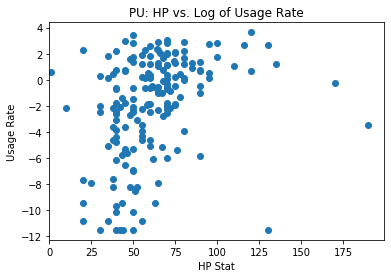

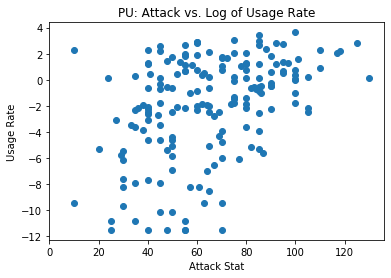

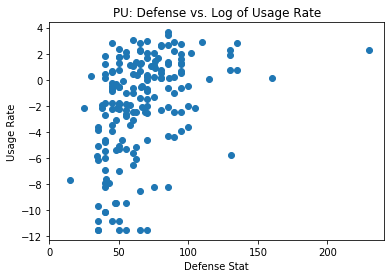

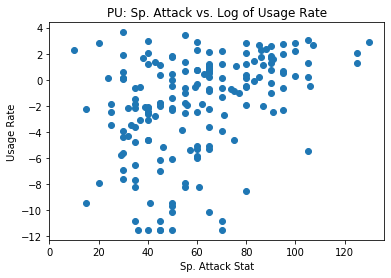

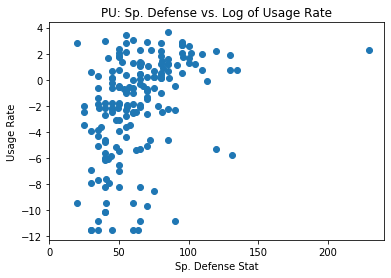

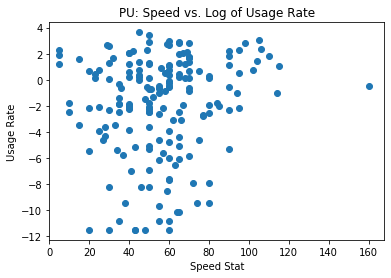

In [793]:
pu_hp = pu_merge["HP"]
print("The mean of HP in the PU Tier is", round(np.mean(pu_hp),3))

pu_atk = pu_merge["Attack"]
print("The mean of Attack in the PU Tier is", round(np.mean(pu_atk),3))

pu_def = pu_merge["Defense"]
print("The mean of Defense in the PU Tier is", round(np.mean(pu_def),3))

pu_spatk = pu_merge["Sp. Attack"]
print("The mean of Sp. Attack in the PU Tier is", round(np.mean(pu_spatk),3))

pu_spdef = pu_merge["Sp. Defense"]
print("The mean of Sp. Defense in the PU Tier is", round(np.mean(pu_spdef),3))

pu_spd = pu_merge["Speed"]
print("The mean of Speed in the PU Tier is", round(np.mean(pu_spd),3))

pu_ave = pu_merge["Average"]
print("The mean of Stats in the PU Tier is", round(np.mean(pu_ave),3))

new_pu = pu_merge["Usage Rate"].str.rstrip("%").astype("float")
pu_merge["Usage Rate"] = new_pu
log_use_pu = np.log(new_pu)

#PU Graphs: Log of Usage Rates are taken because the values are very small
plt.scatter(pu_hp,log_use_pu)
plt.title("PU: HP vs. Log of Usage Rate")
plt.xlabel("HP Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(pu_atk,log_use_pu)
plt.title("PU: Attack vs. Log of Usage Rate")
plt.xlabel("Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(pu_def,log_use_pu)
plt.title("PU: Defense vs. Log of Usage Rate")
plt.xlabel("Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(pu_spatk,log_use_pu)
plt.title("PU: Sp. Attack vs. Log of Usage Rate")
plt.xlabel("Sp. Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(pu_spdef,log_use_pu)
plt.title("PU: Sp. Defense vs. Log of Usage Rate")
plt.xlabel("Sp. Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(pu_spd,log_use_pu)
plt.title("PU: Speed vs. Log of Usage Rate")
plt.xlabel("Speed Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

In [534]:
reg_hp = LinearRegression().fit(pu_merge[["HP"]], pu_merge[["Usage Rate"]])
print("The correlation coefficienct of HP and PU Usage Rate is", float(np.corrcoef(pu_hp, pu_merge["Usage Rate"])[0][1]))
print("The regression slope of HP and the PU Usage Rate is", float(reg_hp.coef_))
print("The Spearman Coefficient of HP and the PU Usage Rate is", spearmanr(pu_hp, pu_merge["Usage Rate"]).correlation)

reg_atk = LinearRegression().fit(pu_merge[["Attack"]], pu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Attack and PU Usage Rate is", float(np.corrcoef(pu_atk, pu_merge["Usage Rate"])[0][1]))
print("The regression slope of Attack and the PU Usage Rate is", float(reg_atk.coef_))
print("The Spearman Coefficient of Attack and the PU Usage Rate is", spearmanr(pu_atk, pu_merge["Usage Rate"]).correlation)

reg_def = LinearRegression().fit(pu_merge[["Defense"]], pu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Defense and PU Usage Rate is", float(np.corrcoef(pu_def, pu_merge["Usage Rate"])[0][1]))
print("The regression slope of Defense and the PU Usage Rate is", float(reg_def.coef_))
print("The Spearman Coefficient of Defense and the PU Usage Rate is", spearmanr(pu_def, pu_merge["Usage Rate"]).correlation)

reg_spatk = LinearRegression().fit(pu_merge[["Sp. Attack"]], pu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Attack and PU Usage Rate is", float(np.corrcoef(pu_spatk, pu_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Attack and the PU Usage Rate is", float(reg_spatk.coef_))
print("The Spearman Coefficient of Sp. Attack and the PU Usage Rate is", spearmanr(pu_spatk, pu_merge["Usage Rate"]).correlation)

reg_spdef = LinearRegression().fit(pu_merge[["Sp. Defense"]], pu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Defense and PU Usage Rate is", float(np.corrcoef(pu_spdef, pu_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Defense and the PU Usage Rate is", float(reg_spdef.coef_))
print("The Spearman Coefficient of Sp. Defense and the PU Usage Rate is", spearmanr(pu_spdef, pu_merge["Usage Rate"]).correlation)

reg_spd = LinearRegression().fit(pu_merge[["Speed"]], pu_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Speed and PU Usage Rate is", float(np.corrcoef(pu_spd, pu_merge["Usage Rate"])[0][1]))
print("The regression slope of Speed and the PU Usage Rate is", float(reg_spd.coef_))
print("The Spearman Coefficient of Speed and the PU Usage Rate is", spearmanr(pu_spd, pu_merge["Usage Rate"]).correlation)

The correlation coefficienct of HP and PU Usage Rate is 0.2400466569399463
The regression slope of HP and the PU Usage Rate is 0.05291341645935825
The Spearman Coefficient of HP and the PU Usage Rate is 0.4319975090889348

The correlation coefficienct of Attack and PU Usage Rate is 0.24742853682349647
The regression slope of Attack and the PU Usage Rate is 0.058225448254890094
The Spearman Coefficient of Attack and the PU Usage Rate is 0.40874865373228525

The correlation coefficienct of Defense and PU Usage Rate is 0.2988110377056619
The regression slope of Defense and the PU Usage Rate is 0.06126019912740604
The Spearman Coefficient of Defense and the PU Usage Rate is 0.4553180548753259

The correlation coefficienct of Sp. Attack and PU Usage Rate is 0.23259100201969826
The regression slope of Sp. Attack and the PU Usage Rate is 0.05344989446540219
The Spearman Coefficient of Sp. Attack and the PU Usage Rate is 0.4000770061766623

The correlation coefficienct of Sp. Defense and PU Us

In [796]:
#from small to big: doing the same stats analysis for the dataset as a whole
new_tot = total_merged["Usage Rate"].str.rstrip("%").astype("float")
total_merged["Usage Rate"] = new_tot
log_use_tot = np.log(new_tot)

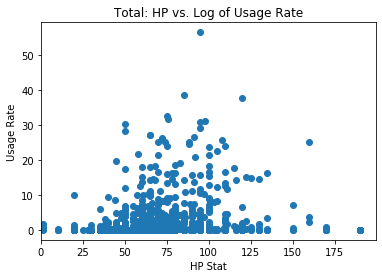

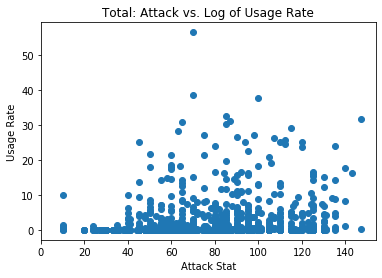

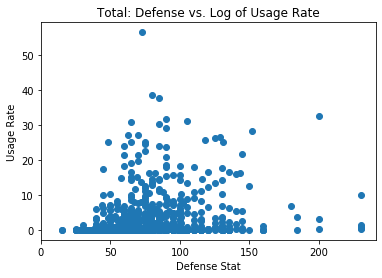

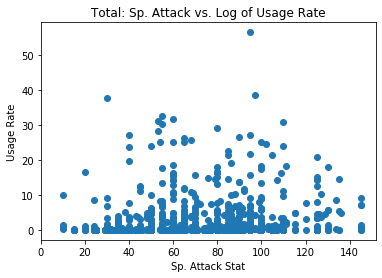

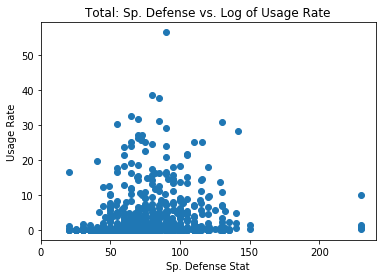

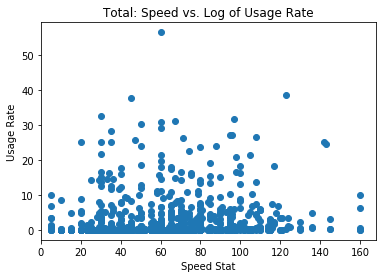

In [797]:
plt.scatter(total_merged["HP"], total_merged["Usage Rate"])
plt.title("Total: HP vs. Log of Usage Rate")
plt.xlabel("HP Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(total_merged["Attack"], total_merged["Usage Rate"])
plt.title("Total: Attack vs. Log of Usage Rate")
plt.xlabel("Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(total_merged["Defense"], total_merged["Usage Rate"])
plt.title("Total: Defense vs. Log of Usage Rate")
plt.xlabel("Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(total_merged["Sp. Attack"], total_merged["Usage Rate"])
plt.title("Total: Sp. Attack vs. Log of Usage Rate")
plt.xlabel("Sp. Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(total_merged["Sp. Defense"], total_merged["Usage Rate"])
plt.title("Total: Sp. Defense vs. Log of Usage Rate")
plt.xlabel("Sp. Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(total_merged["Speed"], total_merged["Usage Rate"])
plt.title("Total: Speed vs. Log of Usage Rate")
plt.xlabel("Speed Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

In [798]:
reg_hp = LinearRegression().fit(total_merged[["HP"]], total_merged[["Usage Rate"]])
print("The correlation coefficienct of HP and Usage Rate is", float(np.corrcoef(total_merged["HP"], total_merged["Usage Rate"])[0][1]))
print("The regression slope of HP and the Usage Rate is", float(reg_hp.coef_))
print("The Spearman Coefficient of HP and the Usage Rate is", spearmanr(total_merged["HP"], total_merged["Usage Rate"]).correlation)

reg_atk = LinearRegression().fit(total_merged[["Attack"]], total_merged[["Usage Rate"]])
print("\nThe correlation coefficienct of Attack and Usage Rate is", float(np.corrcoef(total_merged["Attack"], total_merged["Usage Rate"])[0][1]))
print("The regression slope of Attack and the Usage Rate is", float(reg_atk.coef_))
print("The Spearman Coefficient of Attack and the Usage Rate is", spearmanr(total_merged["Attack"], total_merged["Usage Rate"]).correlation)

reg_def = LinearRegression().fit(total_merged[["Defense"]], total_merged[["Usage Rate"]])
print("\nThe correlation coefficienct of Defense and Usage Rate is", float(np.corrcoef(total_merged["Defense"], total_merged["Usage Rate"])[0][1]))
print("The regression slope of Defense and the Usage Rate is", float(reg_def.coef_))
print("The Spearman Coefficient of Defense and the Usage Rate is", spearmanr(total_merged["Defense"], total_merged["Usage Rate"]).correlation)

reg_spatk = LinearRegression().fit(total_merged[["Sp. Attack"]], total_merged[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Attack and Usage Rate is", float(np.corrcoef(total_merged["Sp. Attack"], total_merged["Usage Rate"])[0][1]))
print("The regression slope of Sp. Attack and the Usage Rate is", float(reg_spatk.coef_))
print("The Spearman Coefficient of Sp. Attack and the Usage Rate is", spearmanr(total_merged["Sp. Attack"], total_merged["Usage Rate"]).correlation)

reg_spdef = LinearRegression().fit(total_merged[["Sp. Defense"]], total_merged[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Defense and Usage Rate is", float(np.corrcoef(total_merged["Sp. Defense"], total_merged["Usage Rate"])[0][1]))
print("The regression slope of Sp. Defense and the Usage Rate is", float(reg_spdef.coef_))
print("The Spearman Coefficient of Sp. Defense and the Usage Rate is", spearmanr(total_merged["Sp. Defense"], total_merged["Usage Rate"]).correlation)

reg_spd = LinearRegression().fit(total_merged[["Speed"]], total_merged[["Usage Rate"]])
print("\nThe correlation coefficienct of Speed and Usage Rate is", float(np.corrcoef(total_merged["Speed"], total_merged["Usage Rate"])[0][1]))
print("The regression slope of Speed and the Usage Rate is", float(reg_spd.coef_))
print("The Spearman Coefficient of Speed and the Usage Rate is", spearmanr(total_merged["Speed"], total_merged["Usage Rate"]).correlation)

The correlation coefficienct of HP and Usage Rate is 0.19421043547280756
The regression slope of HP and the Usage Rate is 0.04054443116085179
The Spearman Coefficient of HP and the Usage Rate is 0.3863478476259312

The correlation coefficienct of Attack and Usage Rate is 0.19000067754441974
The regression slope of Attack and the Usage Rate is 0.0371143574338663
The Spearman Coefficient of Attack and the Usage Rate is 0.37702782752442693

The correlation coefficienct of Defense and Usage Rate is 0.19616416986187496
The regression slope of Defense and the Usage Rate is 0.03637223467076708
The Spearman Coefficient of Defense and the Usage Rate is 0.35994486719704805

The correlation coefficienct of Sp. Attack and Usage Rate is 0.14837849560365632
The regression slope of Sp. Attack and the Usage Rate is 0.029470804077157856
The Spearman Coefficient of Sp. Attack and the Usage Rate is 0.3296074294444366

The correlation coefficienct of Sp. Defense and Usage Rate is 0.1631903463932349
The re